# Monte Carlo Simulation for FE
## IEOR 4703

### Confidence intervals: CLT vs Bootstrap Algorithm

We aim to compare intervals for the mean of an exponential distribution using CLT and Bootstrap.

$X \sim \mathrm{Exp}(\theta)$, where $\theta = \mathbb{E}[X]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from time import time
from statsmodels.distributions.empirical_distribution import ECDF

### Exact solution

In [2]:
theta = 2
print('theta = %3.1f' % theta)

theta = 2.0


### Approximate solution via simulation

In [3]:
np.random.seed(156578)

In [4]:
# axis for plots
lowerB = theta - 1
upperB = theta + 1
boundY = 1

# sample sizes
nN = [100, 500, 1000, 5000]
sizeN = len(nN)

# confidence levels
alpha = np.array([0.01, 0.05, 0.5])
# compute quantiles
z = sp.stats.norm.ppf(1 - alpha / 2)
sizeM = len(alpha)

# number of bootstrap samples
B = 100
V_B = np.zeros(B)

theta_hat_vec = np.zeros(sizeN)
lb_clt = np.zeros([sizeN, sizeM])
ub_clt = np.zeros([sizeN, sizeM])
lb_boot = np.zeros([sizeN, sizeM])
ub_boot = np.zeros([sizeN, sizeM])

for i in range(sizeN):

    N = nN[i]
    X = np.random.exponential(theta, N)
    theta_hat = np.mean(X)
    sig2_N = np.var(X, ddof=1)

    # bootstrap
    for b in range(B):
        X_b = np.random.choice(X, len(X), replace=True)
        theta_b = np.mean(X_b)
        V_B[b] = (theta_b - theta_hat)**2
    mse_F = np.mean(V_B)


    # store empirical mean
    theta_hat_vec[i] = theta_hat

    # clt confidence intervals
    lb_clt[i] = theta_hat - z * np.sqrt(sig2_N / N)
    ub_clt[i] = theta_hat + z * np.sqrt(sig2_N / N)

    # bootstrap confidence intervals
    lb_boot[i] = theta_hat - z * np.sqrt(mse_F)
    ub_boot[i] = theta_hat + z * np.sqrt(mse_F)


### Plot the confidence intervals

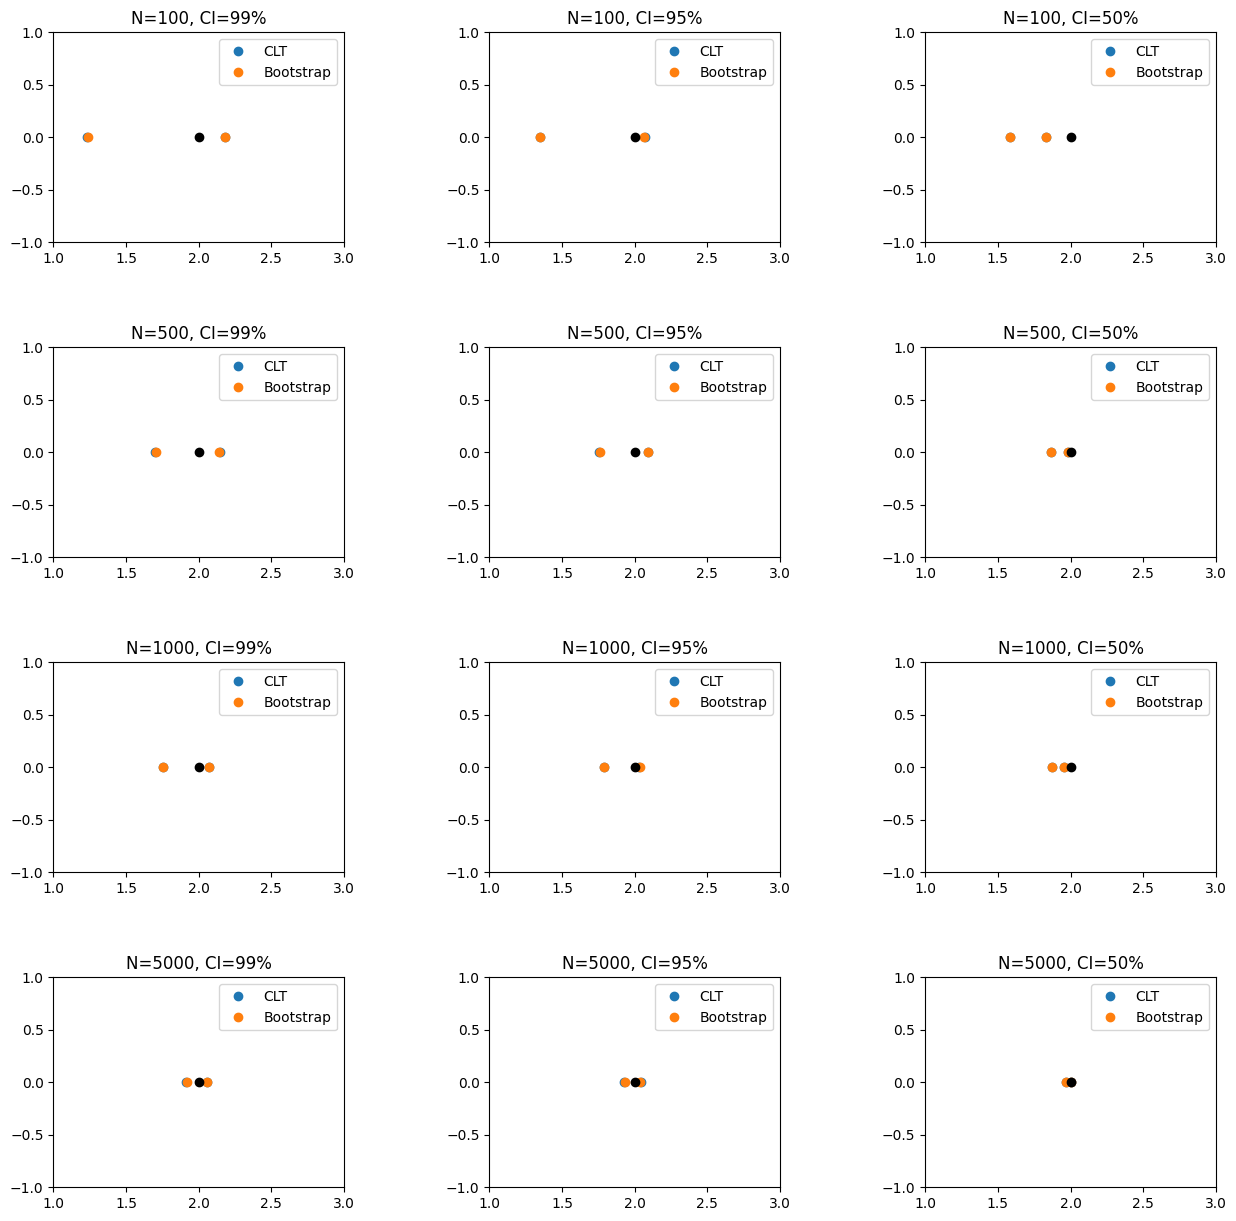

In [5]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace = .5, wspace = .5)
for i in range(sizeN):
    for j in range(sizeM):
        plt.subplot(sizeN, sizeM, sizeM*(i) + j + 1)
        plt.plot([lb_clt[i,j], ub_clt[i,j]], [0,0], 'o')
        plt.plot([lb_boot[i,j], ub_boot[i,j]], [0,0], 'o')
        plt.plot(theta, 0, 'o', color='black')
        plt.title('N=%i, CI=%2.0f%s' % (nN[i], 100*(1-alpha[j]), '%'))
        plt.xlim([lowerB, upperB])
        plt.ylim([-boundY, boundY])
        plt.legend(['CLT','Bootstrap'])
plt.show()